In [1]:
import keras
keras.__version__
from pylab import *
plt.rc('font',family='Times New Roman')#全局改成Times New Roman
import os
from __future__ import division, print_function
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#data_dir = 'D:\TAO2018\MyTensorFlow\论文写作——时间序列预测\UCI空气质量数据库\AirQuality'
fname = os.path.join( 'pollution201907更改终版 - 去除气压 -传统方法用.csv')#delay=3

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:43801]  #43801

print(header)
print(len(lines))

import numpy as np

float_data_qian = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data_qian[i, :] = values

D:\TAO2018\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['date', 'dew', 'pollution', 'temp', 'wnd_dir', 'wnd_spd', 'snow', 'rain', 'target']
43800


In [2]:
temp = float_data_qian[:, 7]  #目标
temp2 = float_data_qian[:, 1]  #目标

# 决策树（不要改动）

In [3]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))

from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
mean = float_data_qian[:30000].mean(axis=0)
float_data =float_data_qian- mean
std = float_data_qian[:30000].std(axis=0)
float_data = float_data/std

target = float_data_qian[:,7]#   目标值没错
y = float_data[:,7]

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#X = float_data   #注意 ！！！！！这里错啦  怎么能把目标值放在训练集，目标无法获取啊
X = float_data[:, :7]   #这里把target去掉了
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

print('X.shape, y.shape, mean.shape, std.shape:')
print(X.shape, y.shape, mean.shape, std.shape)

train_size = int(0.86758 * X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:], y[0:train_size], y[train_size:]
print('X_train.shape, X_test.shape, y_train.shape, y_test.shape:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #############################################################################

#                                         使用SciKit-Learn的线性回归模块预测天气

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
# Fit regression model
rng = np.random.RandomState(1)

clf = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=8, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
clf.fit(X_train, y_train)

# make a prediction set using the test set
prediction = clf.predict(X_test)
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error  
#print("The Explained Variance: %.2f" , regressor.score(X_test, y_test))  
print("The Mean Absolute Error: " , mean_absolute_error(y_test, prediction))  
print("The mean squared Error: "  , mean_squared_error(y_test, prediction))
print("03The MAPE: "  , mean_absolute_percentage_error(y_test, prediction))
print("04The SMAPE: "  , smape(y_test, prediction))


X.shape, y.shape, mean.shape, std.shape:
(43800, 7) (43800,) (8,) (8,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape:
(38000, 7) (5800, 7) (38000,) (5800,)
The Mean Absolute Error:  0.18405337691695844
The mean squared Error:  0.09622226626272162
03The MAPE:  113.41922728379133
04The SMAPE:  -0.08240972508811663


In [4]:
#***********************************还原数据******************************************#
prediction=prediction * std[7]
prediction=prediction + mean[7]

01The MAE:  17.029224137931035
02The MSE:  823.7164224137931
03The MAPE:  36.55767987716462
04The SMAPE:  0.2573812025604614


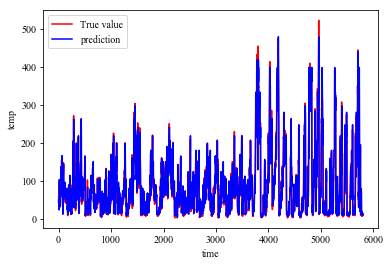

In [5]:
print("01The MAE: " , mean_absolute_error(temp[38000:], prediction))  
print("02The MSE: "  , mean_squared_error(temp[38000:], prediction))
print("03The MAPE: "  , mean_absolute_percentage_error(temp[38000:], prediction))
print("04The SMAPE: "  , smape(temp[38000:], prediction))

plt.plot( temp[38000:], 'r', label='True value')
plt.plot( prediction,'b', label='prediction')

plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

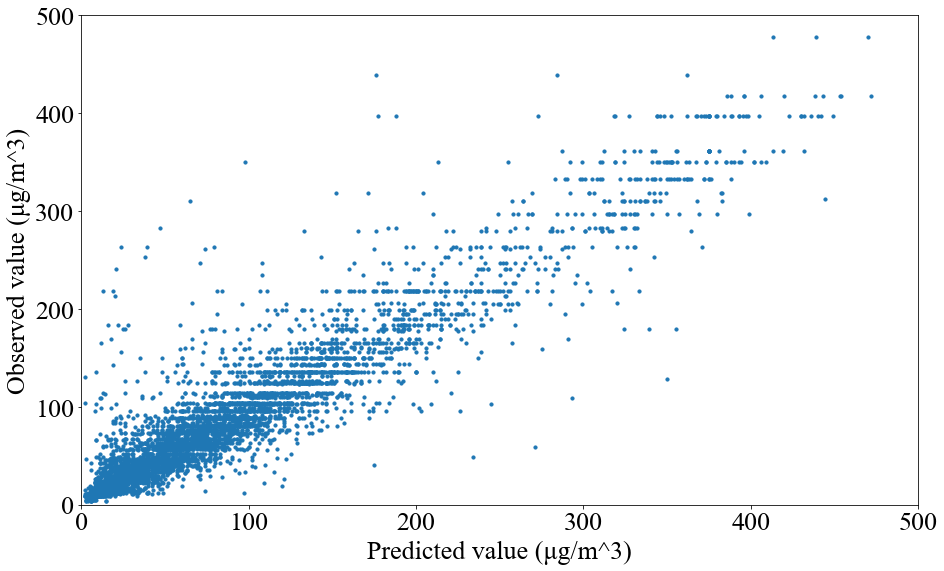

In [6]:
import matplotlib.pyplot as plt

# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))

plt.xlim(xmax=500,xmin=0)
plt.ylim(ymax=500,ymin=0)

plt.scatter(temp[38000:],prediction,s=10)
#ttt
# 设置图表标题并给坐标轴加上标签
#plt.title("GRU",fontsize=24)
plt.xlabel("Predicted value (μg/m^3)",fontsize=26)
plt.ylabel("Observed value (μg/m^3)",fontsize=26)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=26)

plt.show()

In [7]:
target = temp[38000:]
prediction = prediction

def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])
  
#print("Errors: ", error)
#print(error)
  
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值
 
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absError)
 
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

print("MAPE = ", mean_absolute_percentage_error(target, prediction))#平均绝对误差MAE
print("SMAPE = ", smape(target, prediction))#平均绝对误差MAE

# 函数：计算相关系数
def calc_corr(a, b):
    a_avg = sum(a)/len(a)
    b_avg = sum(b)/len(b) 
    # 计算分子，协方差————按照协方差公式，本来要除以n的，由于在相关系数中上下同时约去了n，于是可以不除以n
    cov_ab = sum([(x - a_avg)*(y - b_avg) for x,y in zip(a, b)])
    # 计算分母，方差乘积————方差本来也要除以n，在相关系数中上下同时约去了n，于是可以不除以n
    sq = math.sqrt(sum([(x - a_avg)**2 for x in a])*sum([(x - b_avg)**2 for x in b])) 
    corr_factor = cov_ab/sq
    #return corr_factor
    print(corr_factor)
    
calc_corr(target, prediction)    


MSE =  823.7164224137931
RMSE =  28.700460317106295
MAE =  17.029224137931035
MAPE =  36.55767987716462
SMAPE =  0.2573812025604614
0.9375250905562014


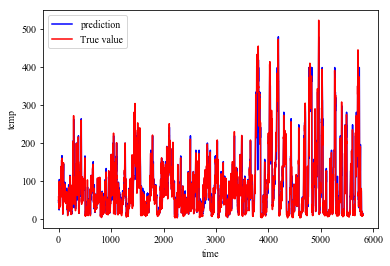

In [8]:

plt.plot( prediction,'b', label='prediction')
plt.plot( temp[38000:], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

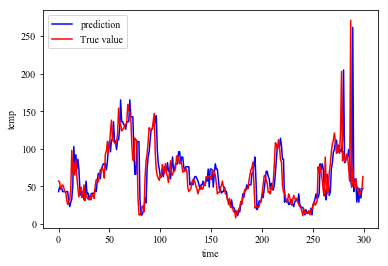

In [9]:
plt.plot( prediction[:300],'b', label='prediction')
plt.plot( temp[38000:38300], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

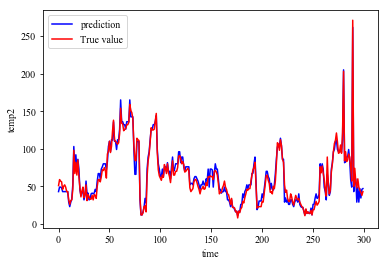

In [10]:
plt.plot( prediction[:300],'b', label='prediction')
plt.plot( temp2[38000:38300], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp2")
plt.legend(loc="best")
plt.show()

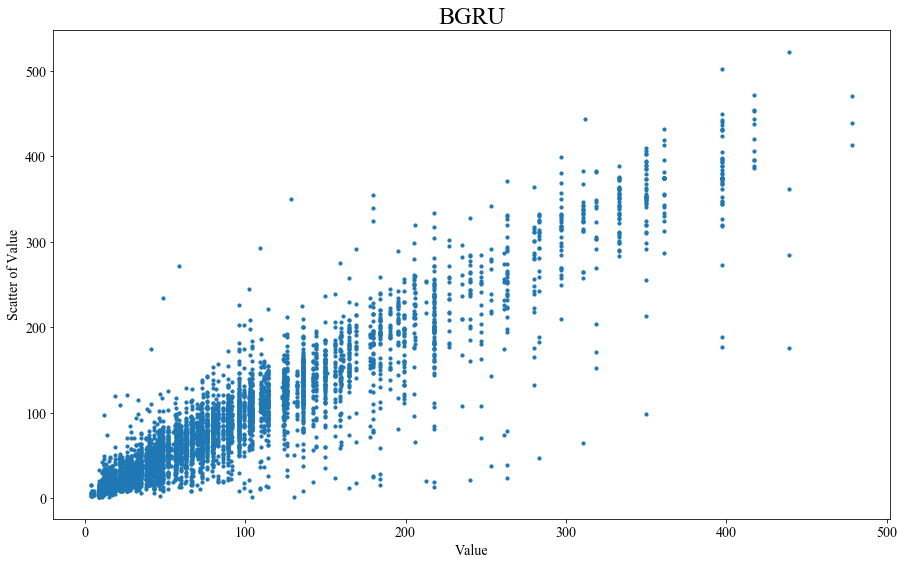

In [12]:
import matplotlib.pyplot as plt

#x_values=[1,2,3,4,5]
#y_values=[1,4,9,16,25]


# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))
plt.scatter(prediction,temp[38000:],s=10)

# 设置图表标题并给坐标轴加上标签
plt.title("BGRU",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Scatter of Value",fontsize=14)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=14)

plt.show()

In [13]:
import numpy  
#numpy.savetxt('A 7月PM25预测结果_DTR.csv', prediction, delimiter = ',')

numpy.savetxt('A 7月PM25预测结果_真实.csv', temp[38000:], delimiter = ',')

# SVR(按论文参数，效果理想，不要改动)

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))

from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
mean = float_data_qian[:30000].mean(axis=0)
float_data =float_data_qian- mean
std = float_data_qian[:30000].std(axis=0)
float_data = float_data/std

target = float_data_qian[:,7]#   目标值没错
y = float_data[:,7]

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#X = float_data   #注意 ！！！！！这里错啦  怎么能把目标值放在训练集，目标无法获取啊
X = float_data[:, :7]   #这里把target去掉了
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


print(X.shape, y.shape, mean.shape, std.shape)

train_size = int(0.86758 * X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:], y[0:train_size], y[train_size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #############################################################################

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=16, gamma=0.1)  #kernel='rbf', C=32, gamma=0.05515674
svr_rbf.fit(X_train, y_train)
y_rbf = svr_rbf.predict(X_test)
#y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error    
print("01The MAE: " , mean_absolute_error(y_test, y_rbf))  
print("02The MSE: "  , mean_squared_error(y_test, y_rbf))
print("03The MAPE: "  , mean_absolute_percentage_error(y_test, y_rbf))
print("04The SMAPE: "  , smape(y_test, y_rbf))

plt.plot( y_rbf,'b', label='y_rbf')
plt.plot( y_test, 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()


In [ ]:
#***********************************还原数据******************************************#
y_rbf=y_rbf * std[7]
y_rbf=y_rbf + mean[7]

print("01The MAE: " , mean_absolute_error(temp[38000:], y_rbf))  
print("02The MSE: "  , mean_squared_error(temp[38000:], y_rbf))
print("03The MAPE: "  , mean_absolute_percentage_error(temp[38000:], y_rbf))
print("04The SMAPE: "  , smape(temp[38000:], y_rbf))

plt.plot( y_rbf,'b', label='y_rbf')
plt.plot( temp[38000:], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

In [ ]:
target = temp[38000:]
prediction = y_rbf

def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])
  
#print("Errors: ", error)
#print(error)
  
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值
 
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absError)
 
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

print("MAPE = ", mean_absolute_percentage_error(target, prediction))#平均绝对误差MAE
print("SMAPE = ", smape(target, prediction))#平均绝对误差MAE

# 函数：计算相关系数
def calc_corr(a, b):
    a_avg = sum(a)/len(a)
    b_avg = sum(b)/len(b) 
    # 计算分子，协方差————按照协方差公式，本来要除以n的，由于在相关系数中上下同时约去了n，于是可以不除以n
    cov_ab = sum([(x - a_avg)*(y - b_avg) for x,y in zip(a, b)])
    # 计算分母，方差乘积————方差本来也要除以n，在相关系数中上下同时约去了n，于是可以不除以n
    sq = math.sqrt(sum([(x - a_avg)**2 for x in a])*sum([(x - b_avg)**2 for x in b])) 
    corr_factor = cov_ab/sq
    #return corr_factor
    print(corr_factor)
    
calc_corr(target, y_rbf)    


In [ ]:
import matplotlib.pyplot as plt

# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))

plt.xlim(xmax=500,xmin=0)
plt.ylim(ymax=500,ymin=0)

plt.scatter(temp[38000:],y_rbf,s=10)
#ttt
# 设置图表标题并给坐标轴加上标签
#plt.title("GRU",fontsize=24)
plt.xlabel("Predicted value (μg/m^3)",fontsize=26)
plt.ylabel("Observed value (μg/m^3)",fontsize=26)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=26)

plt.show()

In [ ]:
import numpy  
numpy.savetxt('A 7月PM25预测结果_SVR.csv', y_rbf, delimiter = ',')

# 计算MAPE

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("01The Mean Absolute Error: " , mean_absolute_percentage_error(y_test, y_rbf)) 

In [ ]:
# show some predictions

ytest_ = svr_rbf.predict(X_test)
plt.plot(ytest_)
plt.show()
print('预测总长度',len(ytest_))


print(std[18])
print(mean[18])
#***********************************还原数据******************************************#
ytest_=ytest_ * std[18]
ytest_=ytest_ + mean[18]
plt.plot(ytest_)
plt.show()

In [ ]:
import numpy  
numpy.savetxt('0224forecasting_SVR.csv', ytest_, delimiter = ',') 

In [ ]:
plt.plot( ytest_[7335:7382],'b', label='predicted value')
plt.plot( temp[68288:68335], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("load")
plt.legend(loc="best")
plt.show()

In [ ]:
print("01The Mean Absolute Error: " , mean_absolute_percentage_error(y_test, y_rbf))

# for Gradient Boosting Regression（不要改动）

In [3]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))

from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
mean = float_data_qian[:30000].mean(axis=0)
float_data =float_data_qian- mean
std = float_data_qian[:30000].std(axis=0)
float_data = float_data/std

target = float_data_qian[:,7]#   目标值没错
y = float_data[:,7]

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#X = float_data   #注意 ！！！！！这里错啦  怎么能把目标值放在训练集，目标无法获取啊
X = float_data[:, :7]   #这里把target去掉了
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


print(X.shape, y.shape, mean.shape, std.shape)

train_size = int(0.86758 * X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:], y[0:train_size], y[train_size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #############################################################################

(43800, 7) (43800,) (8,) (8,)
(38000, 7) (5800, 7) (38000,) (5800,)


In [4]:
#                                         使用SciKit-Learn的线性回归模块预测天气

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Fit regression model
alpha = 0.9
#clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
#                                n_estimators=100, max_depth=3,
#                                learning_rate=.1, min_samples_leaf=15,
#                                min_samples_split=15)
clf = GradientBoostingRegressor(loss='ls', alpha=alpha, learning_rate=.08,min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train, y_train)

# make a prediction set using the test set
# Predict

y_2 = clf.predict(X_test)
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error  
#print("The Explained Variance: %.2f" , regressor.score(X_test, y_test))  
print("The Mean Absolute Error: " , mean_absolute_error(y_test, y_2))  
print("The mean squared Error: "  , mean_squared_error(y_test, y_2))
print("03The MAPE: "  , mean_absolute_percentage_error(y_test, y_2))
print("04The SMAPE: "  , smape(y_test, y_2))

The Mean Absolute Error:  0.18263535185077018
The mean squared Error:  0.0887055442127068
03The MAPE:  106.540667581083
04The SMAPE:  0.2949185622750009


01The MAE:  16.898023792195353
02The MSE:  759.3690770871757
03The MAPE:  39.15874925138292
04The SMAPE:  0.26387982373814556


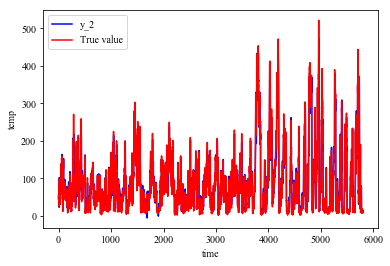

In [5]:
#***********************************还原数据******************************************#
y_2=y_2 * std[7]
y_2=y_2 + mean[7]

print("01The MAE: " , mean_absolute_error(temp[38000:], y_2))  
print("02The MSE: "  , mean_squared_error(temp[38000:], y_2))
print("03The MAPE: "  , mean_absolute_percentage_error(temp[38000:], y_2))
print("04The SMAPE: "  , smape(temp[38000:], y_2))

plt.plot( y_2,'b', label='y_2')
plt.plot( temp[38000:], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

In [6]:
target = temp[38000:]
prediction = y_2

def smape(actual, predicted):
    a = np.abs(np.array(actual) - np.array(predicted))
    b = np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(a, b, out=np.zeros_like(a), where=b!=0, casting='unsafe'))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])
  
#print("Errors: ", error)
#print(error)
  
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值
 
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absError)
 
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE

print("MAPE = ", mean_absolute_percentage_error(target, prediction))#平均绝对误差MAE
print("SMAPE = ", smape(target, prediction))#平均绝对误差MAE

# 函数：计算相关系数
def calc_corr(a, b):
    a_avg = sum(a)/len(a)
    b_avg = sum(b)/len(b) 
    # 计算分子，协方差————按照协方差公式，本来要除以n的，由于在相关系数中上下同时约去了n，于是可以不除以n
    cov_ab = sum([(x - a_avg)*(y - b_avg) for x,y in zip(a, b)])
    # 计算分母，方差乘积————方差本来也要除以n，在相关系数中上下同时约去了n，于是可以不除以n
    sq = math.sqrt(sum([(x - a_avg)**2 for x in a])*sum([(x - b_avg)**2 for x in b])) 
    corr_factor = cov_ab/sq
    #return corr_factor
    print(corr_factor)
    
calc_corr(target, prediction)    


MSE =  759.3690770871757
RMSE =  27.55665213858853
MAE =  16.898023792195353
MAPE =  39.15874925138292
SMAPE =  0.26387982373814556
0.9420702140259652


In [7]:
import numpy  
numpy.savetxt('A 7月PM25预测结果_GBR.csv', y_2, delimiter = ',')

In [ ]:

plt.plot( temp[38000:], 'r', label='True value')
plt.plot( y_2,'b', label='y_2')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# s为点的大小
#plt.scatter(x_values,y_values,s=100)
plt.figure(figsize=(15,9))

plt.xlim(xmax=500,xmin=0)
plt.ylim(ymax=500,ymin=0)

plt.scatter(temp[38000:],y_2,s=10)
#ttt
# 设置图表标题并给坐标轴加上标签
#plt.title("GRU",fontsize=24)
plt.xlabel("Predicted value (μg/m^3)",fontsize=26)
plt.ylabel("Observed value (μg/m^3)",fontsize=26)

# 设置刻度标记的大小
plt.tick_params(axis='both',which='major',labelsize=26)

plt.show()